In [720]:
import pandas as pd
import numpy as np

Importing the results dataset and shootout dataset

In [721]:
df_results = pd.read_csv('./Data/results.csv')
df_shooutouts = pd.read_csv('./Data/shootouts.csv')

Generating ID for individual row in the imported dataset
By combining date, home_team and away_tesm

In [722]:
def make_id(df:pd.DataFrame):
    df['ID'] = df.date+ '-' + df.home_team+ '-' + df.away_team
    return df
id_results_df = make_id(df_results)
id_shootouts_df = make_id(df_shooutouts)

Adding to the score of home team or away team based upon the wins in shootouts.

In [723]:
s_out_id = list(df_shooutouts.ID)
s_out_id = list(df_results[df_results.ID.isin(s_out_id)].ID)

df_shooutouts = df_shooutouts[df_shooutouts.ID.isin(s_out_id)]
print(df_shooutouts.shape)
print('Adding to results score from shooutouts.')
for id in s_out_id:
    entry = df_results[df_results.ID == id]
    current_sho_winner = id_shootouts_df[id_shootouts_df.ID == id].winner.values[0]    
    home_team = entry.home_team.values[0]
    away_team = entry.away_team.values[0]
    if (current_sho_winner == home_team):
        chs = df_results[df_results.ID == id].home_score
        df_results.loc[df_results.ID == id, 'home_score']= chs.values[0]+ 1
    elif (current_sho_winner == away_team):
        cas = df_results[df_results.ID == id].away_score
        df_results.loc[df_results.ID == id, 'away_score']= cas.values[0]+ 1
    print('.', end='')
print('\nDone')
    

(555, 5)
Adding to results score from shooutouts.
...........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................
Done


Creating a new column called winner in results dataset.

 Assigning following labels to a new column called winner:

**[tie, home, away]**


In [724]:
def winner_col(home_entry, away_entry):
    # print(home_entry, ':',away_entry)
    if (home_entry == away_entry):
        return 'tie'
    elif (home_entry > away_entry):
        return 'home'
    else:
        return 'away'
# df_results.apply(lambda entry: winner_col(entry['home_score'], entry['away_score']), axis=1)    
df_results['winner'] = df_results.apply(lambda entry: winner_col(entry['home_score'], entry['away_score']), axis=1)

Discarding extra columns in the dataset.

In [725]:
ready_df = df_results.drop(['ID', 'date', 'home_score', 'away_score'], axis=1)

Dividing the dataset into training and testing sets

In [726]:
per = int(44761*0.8)

train_set = ready_df.iloc[:per, :]
test_set = ready_df.iloc[per:, :]

Convert ready_df from dtype Dataframe to nparray

In [727]:
import numpy as np
dataset = np.asarray(ready_df)
dataset.shape

(44762, 7)

In [728]:
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import MinMaxScaler, LabelEncoder

In [729]:
ready_df.head(1)

,home_team,away_team,tournament,city,country,neutral,winner
0,Scotland,England,Friendly,Glasgow,Scotland,False,tie


In [730]:
encoder_lst = []
# dataset.iloc[:, 4] = encoder.fit_transform(dataset.iloc[:, 4])
for column in range(dataset.shape[1]):
    encoder_lst.append(LabelEncoder())
    dataset[:, column] = encoder_lst[column].fit_transform(dataset[:, column])
dataset = dataset.astype('int32')

In [731]:
scalar = MinMaxScaler(feature_range=(1,2))
dataset = scalar.fit_transform(dataset)


In [732]:
X = dataset[:, :6]
y = dataset[:, 6]
y = y.astype('int')


In [733]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42   
)

print(y_train.astype('int'))
print(type(y_test[0]))

[2 1 1 ... 1 1 1]
<class 'numpy.int32'>


In [734]:
from sklearn.naive_bayes import GaussianNB

# Build a Gaussian Classifier
model = GaussianNB()

# Model training
model.fit(X_train, y_train)

print('Fitting Done')

Fitting Done


In [735]:
row_num = int(input('Input the row number:'))
# Predict Output
predicted = model.predict([X_test[row_num]])

print("Actual Value:", y_test[row_num])
print("Predicted Value:", predicted[0])

Actual Value: 1
Predicted Value: 1


In [736]:
# encoder_lst[0].inverse_transform(dataset[:, 0])

In [737]:
from sklearn.metrics import (
    accuracy_score,
    confusion_matrix,
    ConfusionMatrixDisplay,
    f1_score,
)

y_pred = model.predict(X_test)
accuray = accuracy_score(y_pred, y_test)
f1 = f1_score(y_pred, y_test, average="weighted")

print("Accuracy:", accuray)
print("F1 Score:", f1)

Accuracy: 0.7785099966491679
F1 Score: 0.875463166488727


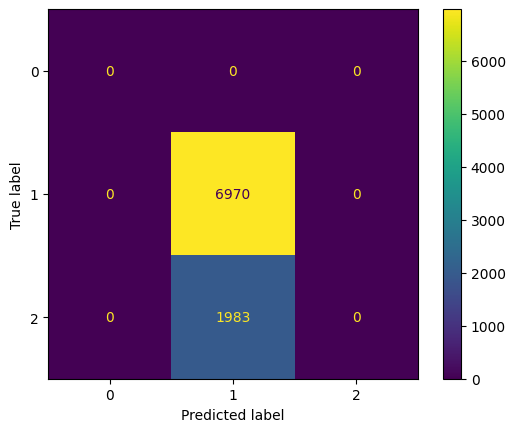

In [738]:
labels = [0,1,2]
cm = confusion_matrix(y_test, y_pred, labels=labels)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
disp.plot();